In [418]:
import numpy as np
from matplotlib import pyplot as plt

In [419]:
def objective_f(x):
    return x**4 + x**3 - x**2 - x

def jacobian_f(x):
    return 4.0* x**3 + 3.0*x**2 - 2.0*x - 1.0

def hessian_f(x):
    return 12.0 * x**2 + 6.0 * x - 2.0

In [420]:
def newton_method(initial_guess, tolerance=1e-6, max_iterations=100):
    x = initial_guess
    iteration = 0
    while abs(jacobian_f(x)) > tolerance and iteration < max_iterations:
        x = x - jacobian_f(x) / (hessian_f(x))  # 牛顿法的迭代公式
        iteration += 1

    return x

In [421]:
def is_positive(matrix):
    
    # try:
    #     L = np.linalg.cholesky(matrix)
    #     is_pos_def = True
    # except np.linalg.LinAlgError:
    #     is_pos_def = False
    # return is_pos_def
    return matrix > 0.0



In [422]:
is_positive(1)

True

In [423]:

def newton_step_regularized(x):
    beta = 0.5
    H = hessian_f(x)
    while not is_positive(H):
       H +=  2 * beta 
    dx = - jacobian_f(x) / H
    return dx
    
def newton_method_regularized(intial_guess, tolerance=1e-6, max_iterations=100):
    x = intial_guess
    iteration = 0
    while abs(jacobian_f(x)) > tolerance and iteration < max_iterations:
        x = x + newton_step_regularized(x) # 牛顿法的迭代公式
        iteration += 1   
    return x


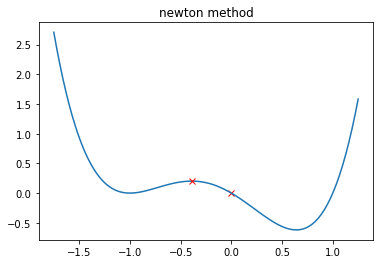

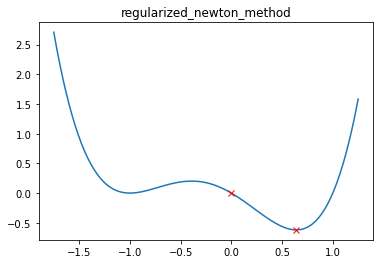

In [424]:
x = np.linspace(-1.75, 1.25, 100)
x_guess = 0.0
plt.figure(1)
plt.plot(x_guess, objective_f(x_guess), "rx")
plt.plot(x, objective_f(x))
result = newton_method(x_guess)
plt.plot(result, objective_f(result), "rx")
plt.title("newton method")
plt.show()

plt.figure(2)
plt.plot(x, objective_f(x))

result = newton_method_regularized(x_guess)
plt.plot(x_guess, objective_f(x_guess), "rx")
plt.plot(result, objective_f(result), "rx")
plt.title('regularized_newton_method')

plt.show()

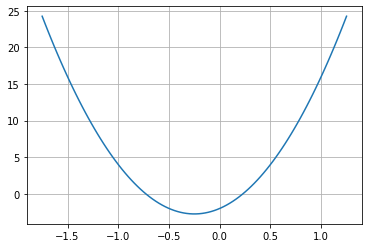

In [425]:
x = np.linspace(-1.75, 1.25, 100)
plt.plot(x, hessian_f(x))
plt.grid()
plt.show()


In [426]:
def line_search_step_length(x, dx):
    alpha = 1
    b = 0.001
    c = 0.5
    while objective_f(x + alpha * dx) > objective_f(x) + b * alpha * jacobian_f(x) * dx:
        alpha *= c
    return alpha

def line_search_newton_step(x):
     newton_step = newton_step_regularized(x)
     alpha = line_search_step_length(x, newton_step)
     return alpha * newton_step

In [427]:
def newton_method_regularized_line_search(intial_guess, tolerance=1e-6, max_iterations=100):
    x = intial_guess
    iteration = 0
    while abs(jacobian_f(x)) > tolerance and iteration < max_iterations:
        x = x + line_search_newton_step(x) # 牛顿法的迭代公式
        iteration += 1   
    return x

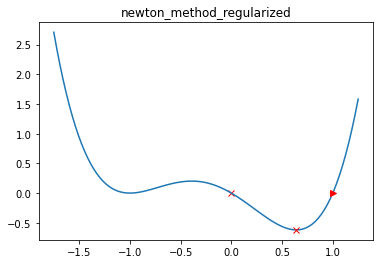

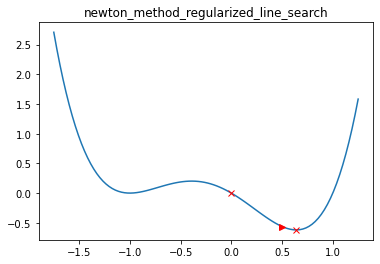

In [428]:
x = np.linspace(-1.75, 1.25, 100)
x_guess = 0.0
plt.figure(1)
plt.plot(x_guess, objective_f(x_guess), "rx")
plt.plot(x, objective_f(x))
next_x = x_guess + newton_step_regularized(x_guess)
plt.plot(next_x, objective_f(next_x), "r>")

result = newton_method_regularized(x_guess)
plt.plot(result, objective_f(result), "rx")

plt.title("newton_method_regularized")
plt.show()

plt.figure(2)
plt.plot(x, objective_f(x))

result = newton_method_regularized_line_search(x_guess)
next_x = x_guess + line_search_newton_step(x_guess)
plt.plot(next_x, objective_f(next_x), "r>")

plt.plot(x_guess, objective_f(x_guess), "rx")
plt.plot(result, objective_f(result), "rx")
plt.title('newton_method_regularized_line_search')

plt.show()